In [1]:
import pandas as pd
import numpy as np 
import string 
import spacy 
from nltk.tokenize import word_tokenize
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

### 1) Importing Dataset

In [3]:
df = pd.read_csv('Elon_musk.csv',encoding='latin')
df

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [4]:
df=df['Text']
df

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

### 2) Removing Leading And Trailing Characters

In [5]:
df = [y.strip() for y in df]
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

### 3) Lets Remove Empty Strings Aswell

In [6]:
df = [x for x in df if x] 
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

### 4) Lets Join the list into one string

In [7]:
df1 = ' '.join(df)
df1

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [8]:
df2 = df1.translate(str.maketrans("\x92", "'", string.punctuation)) 
df2

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

### 5) Lets Perform Tokenization

In [9]:
df3 = word_tokenize(df2)
df3

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [10]:
df3[0:50]

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj']

In [11]:
len(df3)

21373

In [12]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
df4 = [word for word in df3 if not word in my_stop_words]
print(df4[0:50])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10']


### 6) Lets Normalize the Data

In [14]:
df5 = [x.lower() for x in df4]
print(df5[0:50])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10']


### 7) Lets Perform Stemming on the df5

In [15]:
ps = PorterStemmer()
df6= [ps.stem(word) for word in df5]
print(df6[0:50])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10']


### 8) Natural Langage Processing

In [16]:
nlp = spacy.load('en_core_web_sm')

In [18]:
df7 = nlp(' '.join(df4))
print(df7[0:50])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy


In [19]:
lemmas = [token.lemma_ for token in df7]
print(lemmas[0:50])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy']


### 9) Performing Feature Extraction

In [20]:
vectorizer = CountVectorizer()
x= vectorizer.fit_transform(lemmas)

In [21]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

kunalb11  alien  idaacarmack   ray  trace  cyberpunk   hdr  nextlevel  \
0      2695    231         2433  3615   4493        959  1670       3150   

   have   try  ...  dire  priority  surreal  propaganda  social  \
0  1665  4528  ...  1075      3504     4248        3540    4031   

   httpstcowjrzibkh1h  click  samwise  gamgee  altho  
0                2325    773     3816    1525    247  

[1 rows x 4965 columns]

In [22]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
kunalb11            2695
alien                231
idaacarmack         2433
ray                 3615
trace               4493
...                  ...
httpstcowjrzibkh1h  2325
click                773
samwise             3816
gamgee              1525
altho                247

[4965 rows x 1 columns]

In [23]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

0
005             0
10              1
100             2
1000            3
10000           4
107             5
10x             6
11              7
112             8
11thhour        9
12             10
122            11
13             12
130pm          13
13arm13arm     14
13ericralph31  15
14             16
140pm          17
149watt        18
14yearold      19
15             20
150            21
155            22
16             23
162            24

In [24]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(25)

0
ðogecoin         4964
zzcool           4963
zwiebelbach      4962
zubinanary       4961
zshauladventure  4960
zone             4959
zon              4958
zogfotpik        4957
zip2             4956
zikryzamir       4955
zero             4954
zenit            4953
zeitmas          4952
zealand          4951
zainraz4         4950
yup              4949
ystijd           4948
youyanggu        4947
yourfavgas       4946
youranonnews     4945
youranonnew      4944
your             4943
young            4942
younesh1989      4941
you              4940

In [25]:
print(vectorizer.vocabulary_)

{'kunalb11': 2695, 'alien': 231, 'idaacarmack': 2433, 'ray': 3615, 'trace': 4493, 'cyberpunk': 959, 'hdr': 1670, 'nextlevel': 3150, 'have': 1665, 'try': 4528, 'joerogan': 2615, 'spotify': 4111, 'great': 1604, 'interview': 2544, 'gtera27': 1623, 'doge': 1110, 'underestimate': 4661, 'teslacn': 4338, 'congratulations': 855, 'tesla': 4332, 'china': 739, 'amazing': 257, 'execution': 1320, 'last': 2715, 'year': 4932, 'now': 3190, 'next': 3149, 'even': 1292, 'happy': 1652, 'new': 3146, 'ox': 3307, 'httpstco9wfkmyu2oj': 1860, 'frodo': 1489, 'underdoge': 4660, 'all': 234, 'thought': 4417, 'would': 4907, 'fail': 1356, 'himself': 1716, 'httpstcozgxjfdzzrm': 2393, 'owensparks': 3304, 'flcnhvy': 1430, 'anonyx10': 286, 'haha': 1637, 'thanks': 4376, 'indeed': 2482, 'tweets': 4551, 'definitely': 1014, 'represent': 3699, 'realworld': 3641, 'time': 4436, 'allocation': 236, 'the': 4383, 'entertaining': 1248, 'outcome': 3284, 'likely': 2776, 'givedirectly': 1574, 'just': 2642, 'send': 3884, 'agree': 200, 

In [26]:
print(x.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(x.toarray().shape)

(16023, 4965)


### 10) Lets try and include bi and tri grams

In [28]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4),max_features = 100)
df8 = vectorizer_ngram_range.fit_transform(df)
df8

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [29]:
print(df8.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(vectorizer_ngram_range.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


#### TFidf vectorizer 

In [31]:
vectorizer_n_gram2 = TfidfVectorizer(norm="l1",analyzer='word',ngram_range=(1,4),max_features = 100)
tf_idf_matrix_n_gram= vectorizer_n_gram2.fit_transform(df)

In [32]:
print(vectorizer_n_gram2.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [33]:
print(tf_idf_matrix_n_gram.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.14870864]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### 11) Preparing Wordcloud

In [34]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40))    
    plt.imshow(wordcloud)       
    plt.axis("off")          

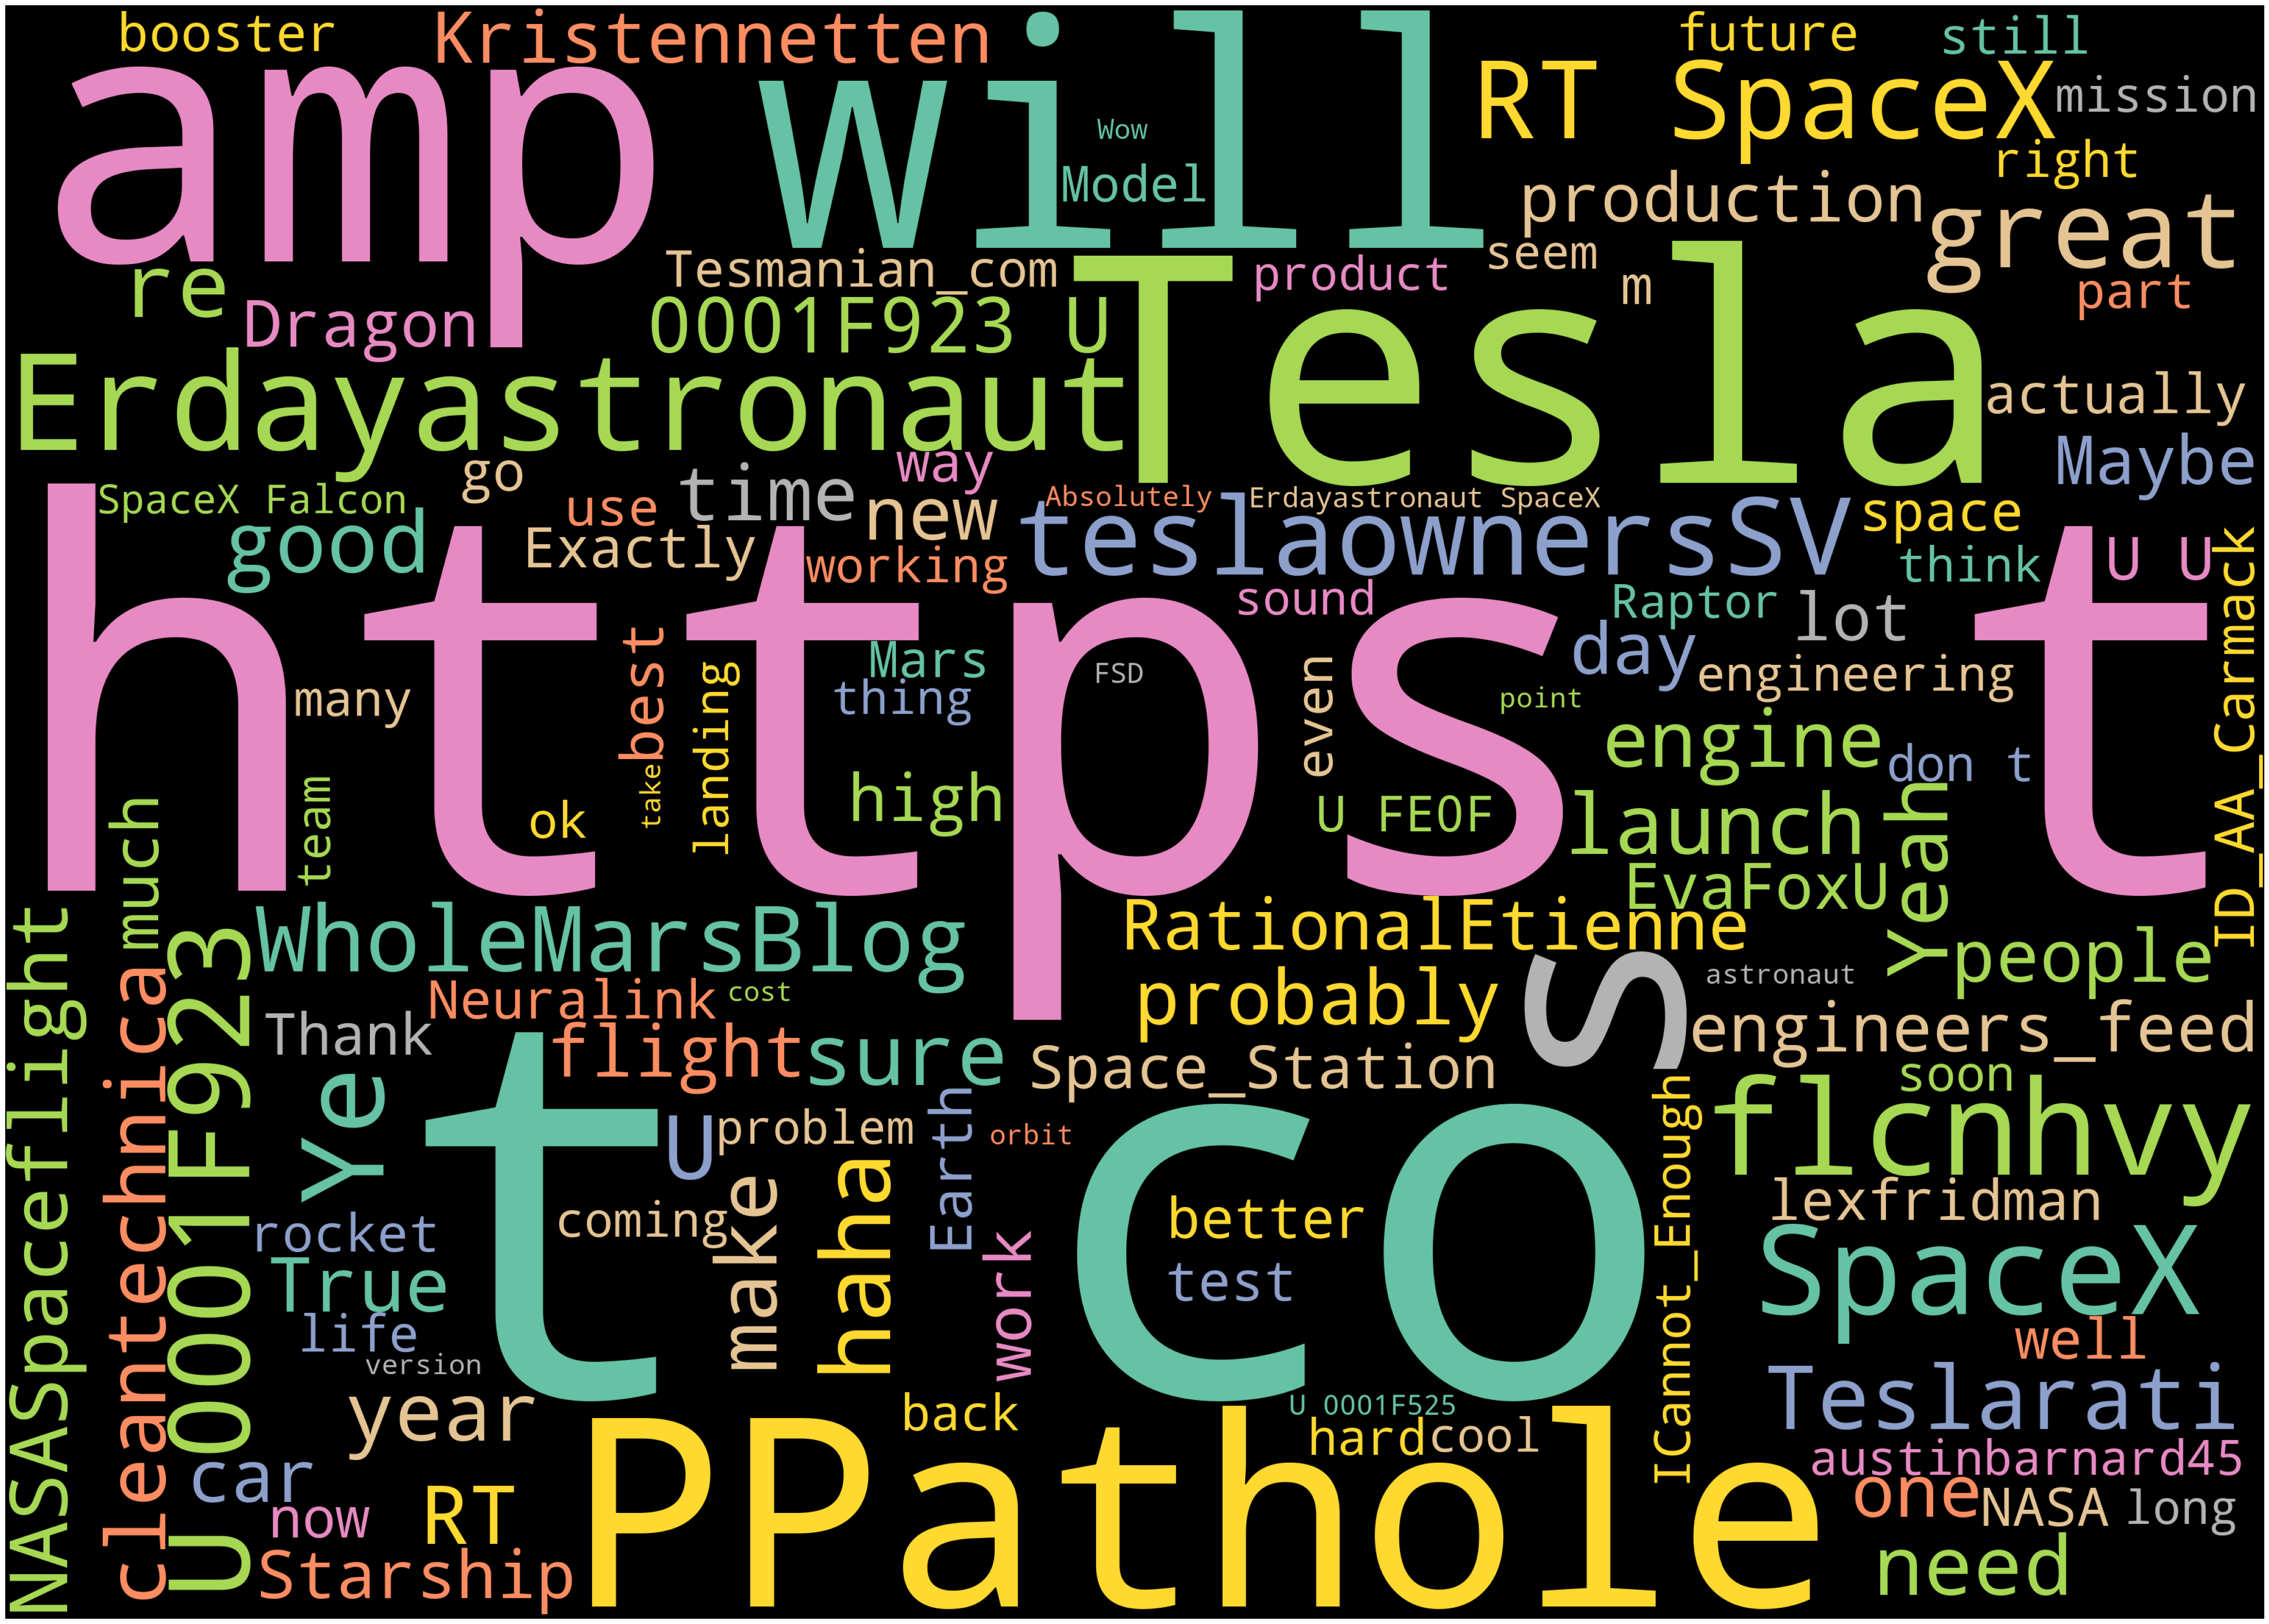

In [35]:
wordcloud = WordCloud(width = 3500,height = 2500,background_color='black',max_words=120,colormap='Set2').generate(df1)
plot_cloud(wordcloud)

In [36]:
df9 = pd.read_csv('Elon_musk.csv', encoding='latin')
df9

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [37]:
df9= df9['Text']
df9

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

### 12) Removing both leading and trailing characters along with empty strings

In [38]:
df9= [x.strip() for x in df9]
df9 = [x for x in df9 if x] 
df9[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [40]:
one1 = df9[1]
doc1 = nlp(one1)
spacy.displacy.render(doc1, style='ent', jupyter=True)

In [41]:
one1

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [42]:
for token in doc1[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


### 13) Lets Filter Nouns and Verbs

In [43]:
nv = [token.text for token in doc1 if token.pos_ in ('NOUN', 'VERB')]
nv

['tracing', 'level', 'tried']

In [44]:
cv = CountVectorizer()

In [45]:
x = cv.fit_transform(nv)

In [46]:
x

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [47]:
cv.get_feature_names_out()

array(['level', 'tracing', 'tried'], dtype=object)

In [48]:
df10 = pd.DataFrame(x.toarray(), columns = cv.get_feature_names_out())
df10

level  tracing  tried
0      0        1      0
1      1        0      0
2      0        0      1

In [49]:
sum1 = x.sum(axis=0)

In [50]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [51]:
df11 = pd.DataFrame({'word' : cv.get_feature_names_out(),'count' : np.array(sum1).flatten()})
df11

word  count
0    level      1
1  tracing      1
2    tried      1

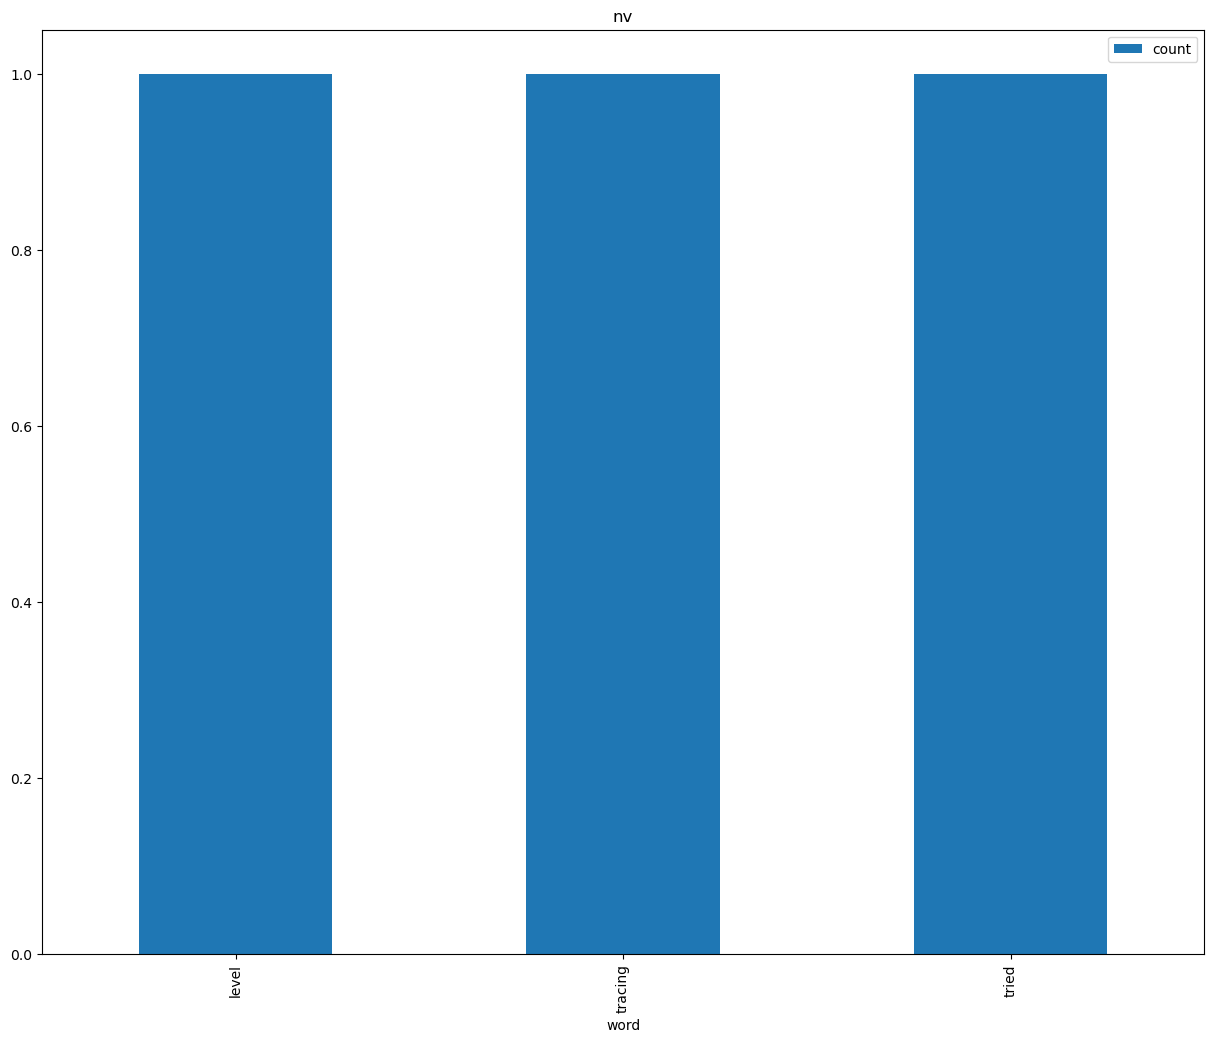

In [52]:
df11[0:15].plot.bar(x='word', figsize=(15,12), title='nv');

### 14) Lets Perform Sentiment Analysis

In [53]:
aff= pd.read_csv('afinn.csv',sep = ",",encoding = 'latin-1')
aff

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [54]:
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [55]:
df12 = tokenize.sent_tokenize(" ".join(df9))

In [56]:
df12

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [57]:
df13 = pd.DataFrame(df12, columns=['sentence'])
df13

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
922  @kenyanwalstreet Not actually a payout, just a...
923  It may never pay out, as the stock cant b
 ht...
924                                    Details Aug 28.
925  AI symbiosis while u wait @vistacruiser7 @flcn...
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[927 rows x 1 columns]

In [58]:
affinity_scores = aff.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [59]:
nlp = spacy.load('en_core_web_sm')

In [60]:
sentiment_lexicon = affinity_scores

In [61]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) 
    return sent_score

#### Lets test it

In [62]:
calculate_sentiment(text = 'great')

3

In [63]:
calculate_sentiment(text = 'amazing')

4

In [64]:
calculate_sentiment(text = 'worst')

-3

In [65]:
df13['sentiment_value'] = df13['sentence'].apply(calculate_sentiment)

In [66]:
df13

sentence  sentiment_value
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated @teslacn Congr...                3
4                   Now on to the next for even more!!                0
..                                                 ...              ...
922  @kenyanwalstreet Not actually a payout, just a...                0
923  It may never pay out, as the stock cant b
 ht...               -4
924                                    Details Aug 28.                0
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0

[927 rows x 2 columns]

In [67]:
df13['no_of_words'] = df13['sentence'].str.split().apply(len)

In [68]:
df13

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -4   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     no_of_words  
0             13  
1              4  
2              4  
3             13  
4              8  
..           ...  
922           11  
923           31  
924            3  
925           47  
926           15  

[927 rows x 3 columns]

In [69]:
df13.sort_values(by='sentiment_value')

sentence  sentiment_value  \
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
840  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
614  Then static fire, checkouts, static fire, fly ...               -4   
683  Occasional flights from land are ok, but frequ...               -4   
..                                                 ...              ...   
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
588  The open areas
 https://t.co/rabjKrtQlw @Sav...               16   
722  We just havent observed the
 https://t.co/mez...               17   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               18   

     no_of_words  
650           60  
840           61  
64            11  
614           12  
683           39  
..           ...  
81            38  
105           94  
588          138  
722           72  
36           231  

[927 rows x 3 columns]

### 15) Lets look at the sentiment score

In [70]:
df13[df13['sentiment_value']<=0].head()

sentence  sentiment_value  \
0  @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                 Have you tried it?                0   
4                 Now on to the next for even more!!                0   
5                          Happy New Year of the Ox!                0   
6  https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   

   no_of_words  
0           13  
1            4  
4            8  
5            6  
6           14

In [71]:
df13[df13['sentiment_value']<=0].head()['sentence'].tolist()

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.']

<Axes: xlabel='sentiment_value', ylabel='Density'>

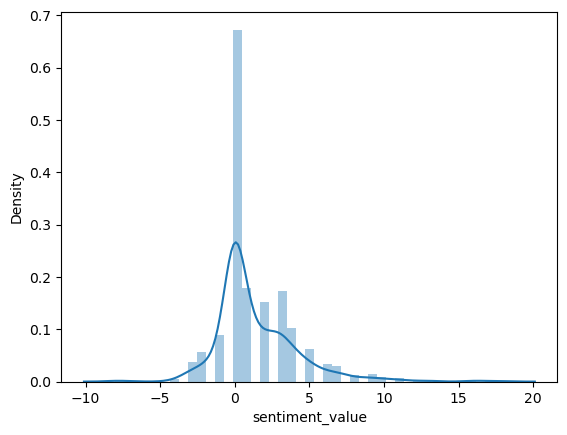

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df13['sentiment_value'])

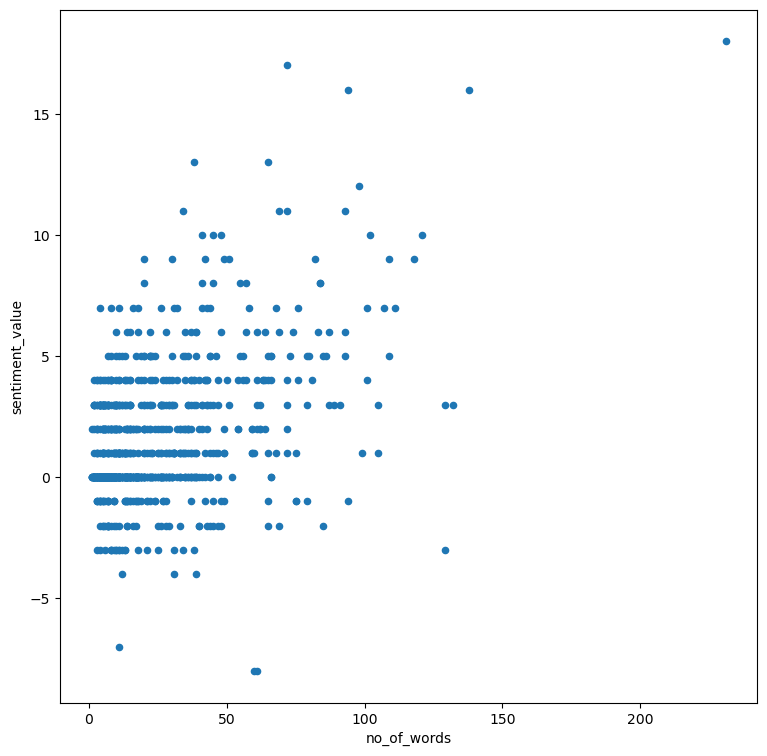

In [73]:
df13.plot.scatter(x='no_of_words',y='sentiment_value',figsize=(9,9));

In [74]:
pw=pd.read_csv('positive-words.txt',on_bad_lines='skip')
pw

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                           
1                           ; Opinion Lexicon: Positive                          
2                                                     ;                          
3     ; This file contains a list of POSITIVE opinio...                          
4                                                     ;                          
...                                                 ...                          
2026                                           youthful                          
2027                                               zeal                          
2028                                             zenith                          
2029                                               zest                          
2030                                              zippy                          

[2031 rows x 1 columns]

In [75]:
pw=pw.iloc[25:]
pw =pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
pw.reset_index(inplace=True)
pw =pw.drop('index',axis=1)
pw['Score'] = 1
pw

Words  Score
0            a+      1
1        abound      1
2       abounds      1
3     abundance      1
4      abundant      1
...         ...    ...
2001   youthful      1
2002       zeal      1
2003     zenith      1
2004       zest      1
2005      zippy      1

[2006 rows x 2 columns]

In [76]:
nw=pd.read_csv('negative-words.txt',encoding='latin-1',on_bad_lines='skip')
nw

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                             
1                           ; Opinion Lexicon: Negative                            
2                                                     ;                            
3     ; This file contains a list of NEGATIVE opinio...                            
4                                                     ;                            
...                                                 ...                            
4803                                               zaps                            
4804                                             zealot                            
4805                                            zealous                            
4806                                          zealously                            
4807                                             zombie                            

[4808 rows x 1 columns]

In [77]:
nw = nw.iloc[25:]
nw = nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
nw.reset_index(inplace=True)
nw = nw.drop('index',axis=1)
nw['Score'] = -1
nw

Words  Score
0        2-faced     -1
1        2-faces     -1
2       abnormal     -1
3        abolish     -1
4     abominable     -1
...          ...    ...
4778        zaps     -1
4779      zealot     -1
4780     zealous     -1
4781   zealously     -1
4782      zombie     -1

[4783 rows x 2 columns]

In [78]:
affinity_scores1 = pw.set_index('Words')['Score'].to_dict()
affinity_scores2 = nw.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [79]:
sentiment_lexicon = affinity_scores

In [80]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [81]:
df13['sentiment_value'] = df13['sentence'].apply(calculate_sentiment)

In [82]:
df13

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                1   
3    @gtera27 Doge is underestimated @teslacn Congr...                0   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -1   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...                0   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     no_of_words  
0             13  
1              4  
2              4  
3             13  
4              8  
..           ...  
922           11  
923           31  
924            3  
925           47  
926           15  

[927 rows x 3 columns]

In [83]:
df13['no_of_words'] = df13['sentence'].str.split().apply(len)
df13

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                1   
3    @gtera27 Doge is underestimated @teslacn Congr...                0   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -1   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...                0   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     no_of_words  
0             13  
1              4  
2              4  
3             13  
4              8  
..           ...  
922           11  
923           31  
924            3  
925           47  
926           15  

[927 rows x 3 columns]

In [84]:
df13.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -5   
765  A full blown Starship and SuperHeavy will be h...               -3   
889  This is primarily an electrical/electronic (ch...               -3   
365  4D is essential for dynamically occluded objec...               -3   
158  We couldnt get everything done in
 https://t....               -3   

     no_of_words  
650           60  
765           36  
889           69  
365           45  
158           65

In [85]:
df13['sentiment_value'].describe()

count    927.000000
mean       0.449838
std        1.239826
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [86]:
df13[df13['sentiment_value']<0].head()

sentence  sentiment_value  \
6   https://t.co/9WFKMYu2oj Frodo was the underdog...               -1   
11  However, if we don
 https://t.co/9Z8Ac6skqx @R...               -1   
16                        Thats what youre missing.               -1   
23  https://t.co/UEEocOfcTb The people have spoken...               -1   
30  The Second Last Kingdom https://t.co/Je4EI88Hm...               -1   

    no_of_words  
6            14  
11           40  
16            4  
23           37  
30           38

In [87]:
df13[df13['sentiment_value']<-1].head(10)['sentence']

55     You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...
64     Also, the road to hell is mostly paved with ba...
158    We couldnt get everything done in
 https://t....
221    @RGVaerialphotos It will be real soon @MarcusH...
222    External
 https://t.co/csIZk6sEVu @bcart03 @ne...
242    @RationalEtienne @ShyCybertruck Fate loves iro...
298    No symptoms for past few days, apart from fati...
306    Last week, I had sym
 https://t.co/gL0mhrqJxY ...
331    Their main PCR search is for the N1 gene, uniq...
365    4D is essential for dynamically occluded objec...
Name: sentence, dtype: object

In [88]:
df13['index'] = range(0, len(df13))

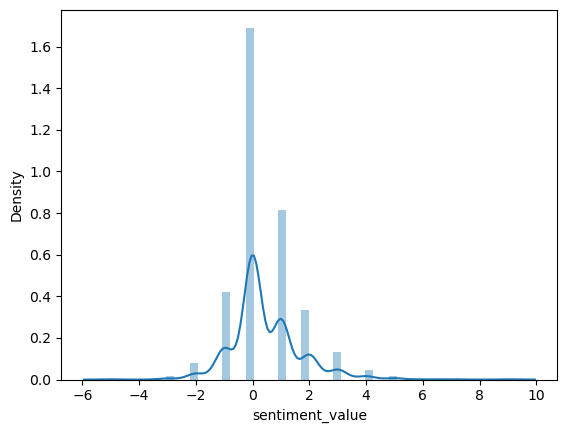

In [89]:
sns.distplot(df13['sentiment_value']);

<Axes: xlabel='no_of_words', ylabel='sentiment_value'>

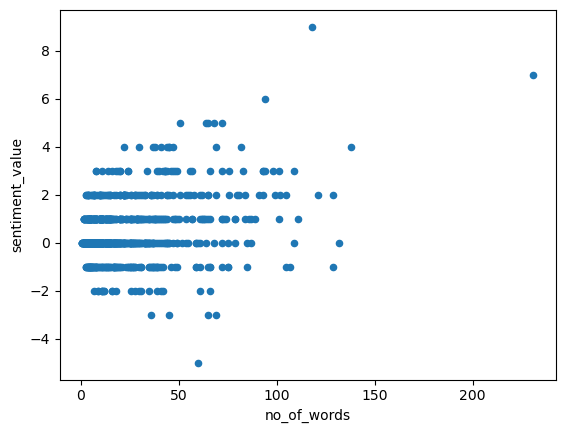

In [90]:
df13.plot.scatter(x='no_of_words',y='sentiment_value')

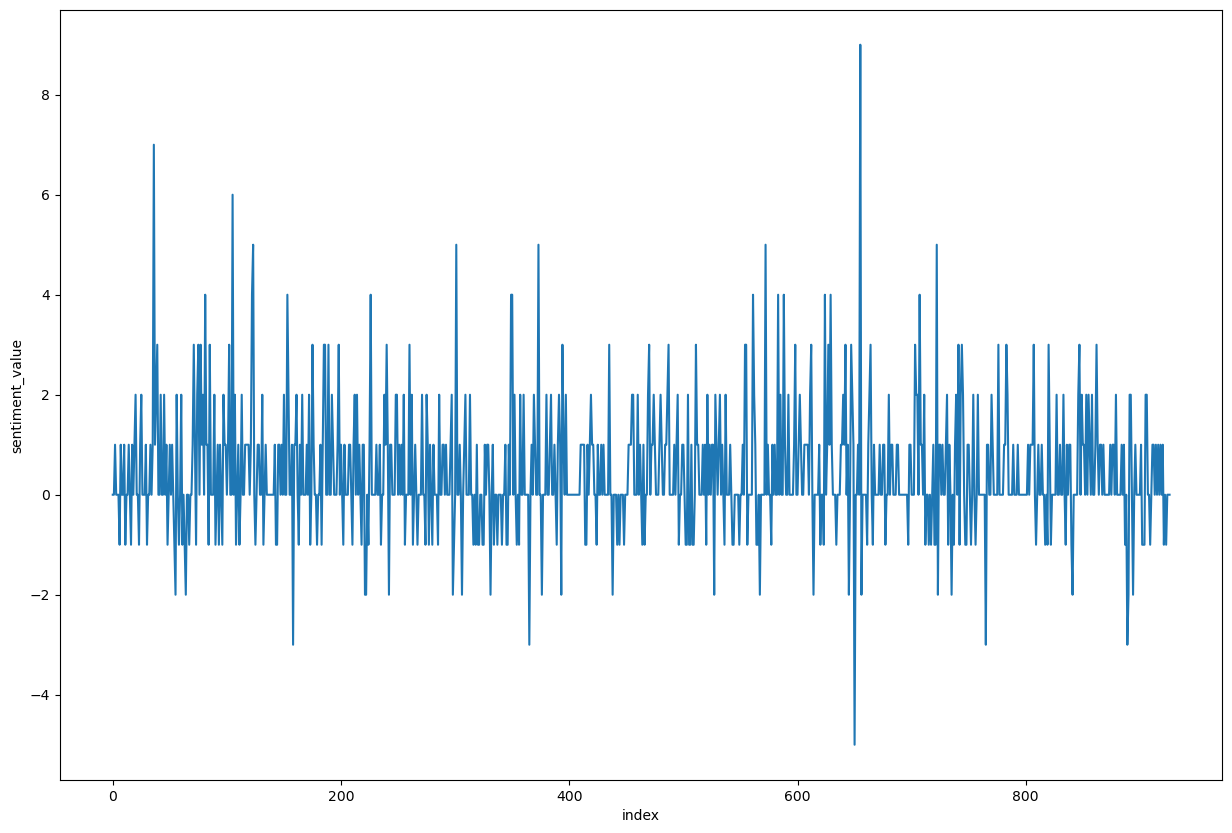

In [91]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=df13);